# Emotion detection

# importing libraries

In [22]:
import  matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,Flatten,Conv2D
from tensorflow.keras.layers import BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
import tensorflow as tf
print("tensor flow version:",tf.__version__)


tensor flow version: 2.9.1


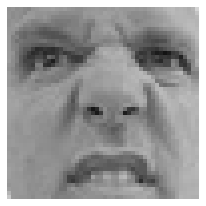

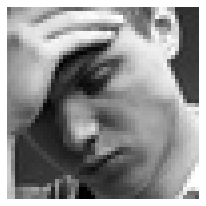

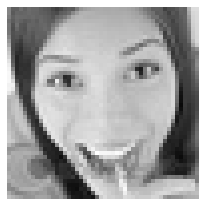

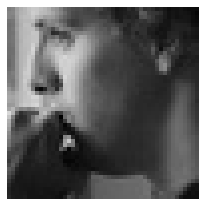

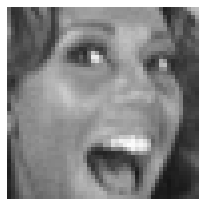

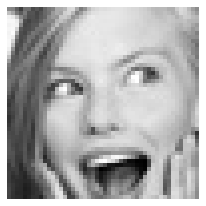

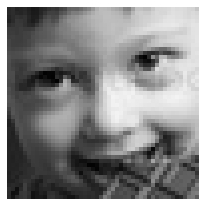

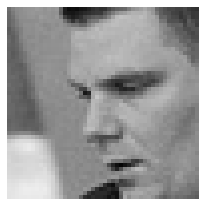

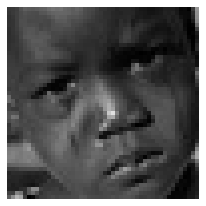

In [23]:
images=glob("train/**/**")
for i in range(9):
    image=random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));plt.axis('off')

In [42]:
img_size=48
batch_size=64
datagen_train = ImageDataGenerator()
train_generator= datagen_train.flow_from_directory("train/",
                                                    target_size =(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode="categorical",
                                                    shuffle=True)

datagen_validation = ImageDataGenerator()
validation_generator= datagen_train.flow_from_directory("test/",
                                                    target_size = (img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode="categorical",
                                                    shuffle=True)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [43]:
def Convolution(input_tensor,filters,kernel_size):
    x=Conv2D(filters=filters, kernel_size=kernel_size, padding="same")(input_tensor)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    x=MaxPooling2D(pool_size=(2,2))(x)
    x=Dropout(0.25)(x)
    
    return x
    

In [44]:
def Dense_f(input_tensor,nodes):
    x=Dense(nodes)(input_tensor)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    x=Dropout(0.25)(x)
    
    return x


In [45]:
def model_fer(input_shape):
    inputs=Input(input_shape)
    conv_1=Convolution(inputs,32,(3,3))
    conv_2=Convolution(inputs,64,(5,5))
    conv_3=Convolution(inputs,128,(3,3))
    
    flatten=Flatten()(conv_3)
    dense_1=Dense_f(flatten,256)
    
    output=Dense(7,activation="softmax")(dense_1)
    
    model=Model(inputs=[inputs],outputs=[output])
    model.compile(loss=['categorical_crossentropy'],optimizer='adam',metrics=['accuracy'])
    
    return model

    
    
    

In [46]:
model=model_fer((48,48,1))
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 48, 48, 128)       1280      
                                                                 
 batch_normalization_10 (Bat  (None, 48, 48, 128)      512       
 chNormalization)                                                
                                                                 
 activation_10 (Activation)  (None, 48, 48, 128)       0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 24, 24, 128)      0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 24, 24, 128)       0   

In [51]:
epochs=15
steps_per_epoch=train_generator.n//train_generator.batch_size
validation_steps=validation_generator.n//validation_generator.batch_size

checkpoint=ModelCheckpoint("model_weights.h5",monitor='val_accuracy',save_weight_only=True,mode='max',verbos=1)
callbacks=[checkpoint]

In [52]:
history=model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=callbacks)

Epoch 1/15
448/448 [==============================] - 137s 300ms/step - loss: 1.6450 - accuracy: 0.3759 - val_loss: 1.8687 - val_accuracy: 0.3228
Epoch 2/15
448/448 [==============================] - 130s 290ms/step - loss: 1.3497 - accuracy: 0.4890 - val_loss: 1.5625 - val_accuracy: 0.3843
Epoch 3/15
448/448 [==============================] - 134s 299ms/step - loss: 1.1872 - accuracy: 0.5559 - val_loss: 1.5559 - val_accuracy: 0.3970
Epoch 4/15
448/448 [==============================] - 132s 294ms/step - loss: 1.0573 - accuracy: 0.6091 - val_loss: 1.4239 - val_accuracy: 0.4572
Epoch 5/15
448/448 [==============================] - 132s 295ms/step - loss: 0.9287 - accuracy: 0.6602 - val_loss: 1.5122 - val_accuracy: 0.4501
Epoch 6/15
448/448 [==============================] - 134s 300ms/step - loss: 0.8005 - accuracy: 0.7106 - val_loss: 1.4551 - val_accuracy: 0.4813
Epoch 7/15
448/448 [==============================] - 178s 397ms/step - loss: 0.6859 - accuracy: 0.7562 - val_loss: 1.5191 -

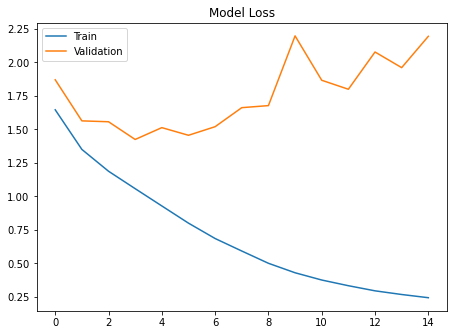

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','Validation',],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)



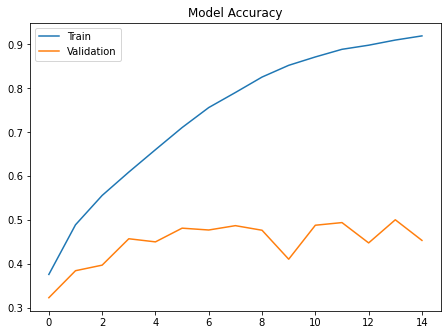

In [60]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Validation',],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)


In [62]:
model_json=model.to_json()
with open("model_a.json","w") as json_file:
    json_file.write(model_json)